In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import dataframe_image as dfi

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error 

import folium
from folium.plugins import HeatMap

from statsmodels.tsa.seasonal import seasonal_decompose

from scipy.cluster.hierarchy import dendrogram, linkage

import threadpoolctl

from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.regressor.alphas import AlphaSelection

In [2]:
df = pd.read_csv('Data/Country-data.csv')

In [3]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [5]:
df.shape

(167, 10)

In [6]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Descriptive statistics

In [7]:
# Perform descriptive analysis to summarize the main features of the dataset
df.describe() 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
#exporting the datatable for GIT
dd = df.describe() 
#dfi.export(dd, 'Images/Datatable.png')

The descriptive analysis of the dataset provides a comprehensive overview of various socio-economic and health indicators for 167 countries. 

*Here's a summary of the key statistics:*

- Child Mortality: The average child mortality rate is 38.27 deaths per 1000 live births, with a widerange from 2.6 to 208, indicating significant differences in child health and survival rates across countries.

- Exports: On average, countries export goods and services worth 41.11% of their GDP. The exports as a percentage of GDP vary greatly among countries, from as low as 0.109% to as high as 200%.

- Health Spending: Countries spend an average of 6.82% of their GDP on health. This percentage rangesfrom 1.81% to 17.9%, showing diverse priorities or capabilities in health expenditure.

- Imports: On average, imports account for 46.89% of the GDP, with a range from 0.0659% to 174%,indicating varying degrees of dependency on imported goods and services.

- Income: The range of income per person is 609 to 125,000 dollars.

- Inflation: The mean inflation rate is 7.78, but it varies widely from -4.21 to 104, reflecting very different economic conditions and monetary policies.

- Life Expectancy: The average life expectancy is approximately 70.56 years, with a minimum of 32.1years and a maximum of 82.8 years, highlighting disparities in healthcare, living conditions, and access to essential services.

- Total Fertility Rate: On average, women have about 2.95 children in their lifetime, with the total fertility rate ranging from 1.15 to 7.49 children per woman.

- GDP per Capita: The range of GDP per capita is 231 to 105,000 dollars.

These statistics highlight the vast differences in economic performance, health outcomes, and demographic characteristics across countries. The data can be further analysed to explore correlations between different indicators, identify trends, and understand the factors driving differences in health, economic well-being, and development levels among countries.


### Histograms

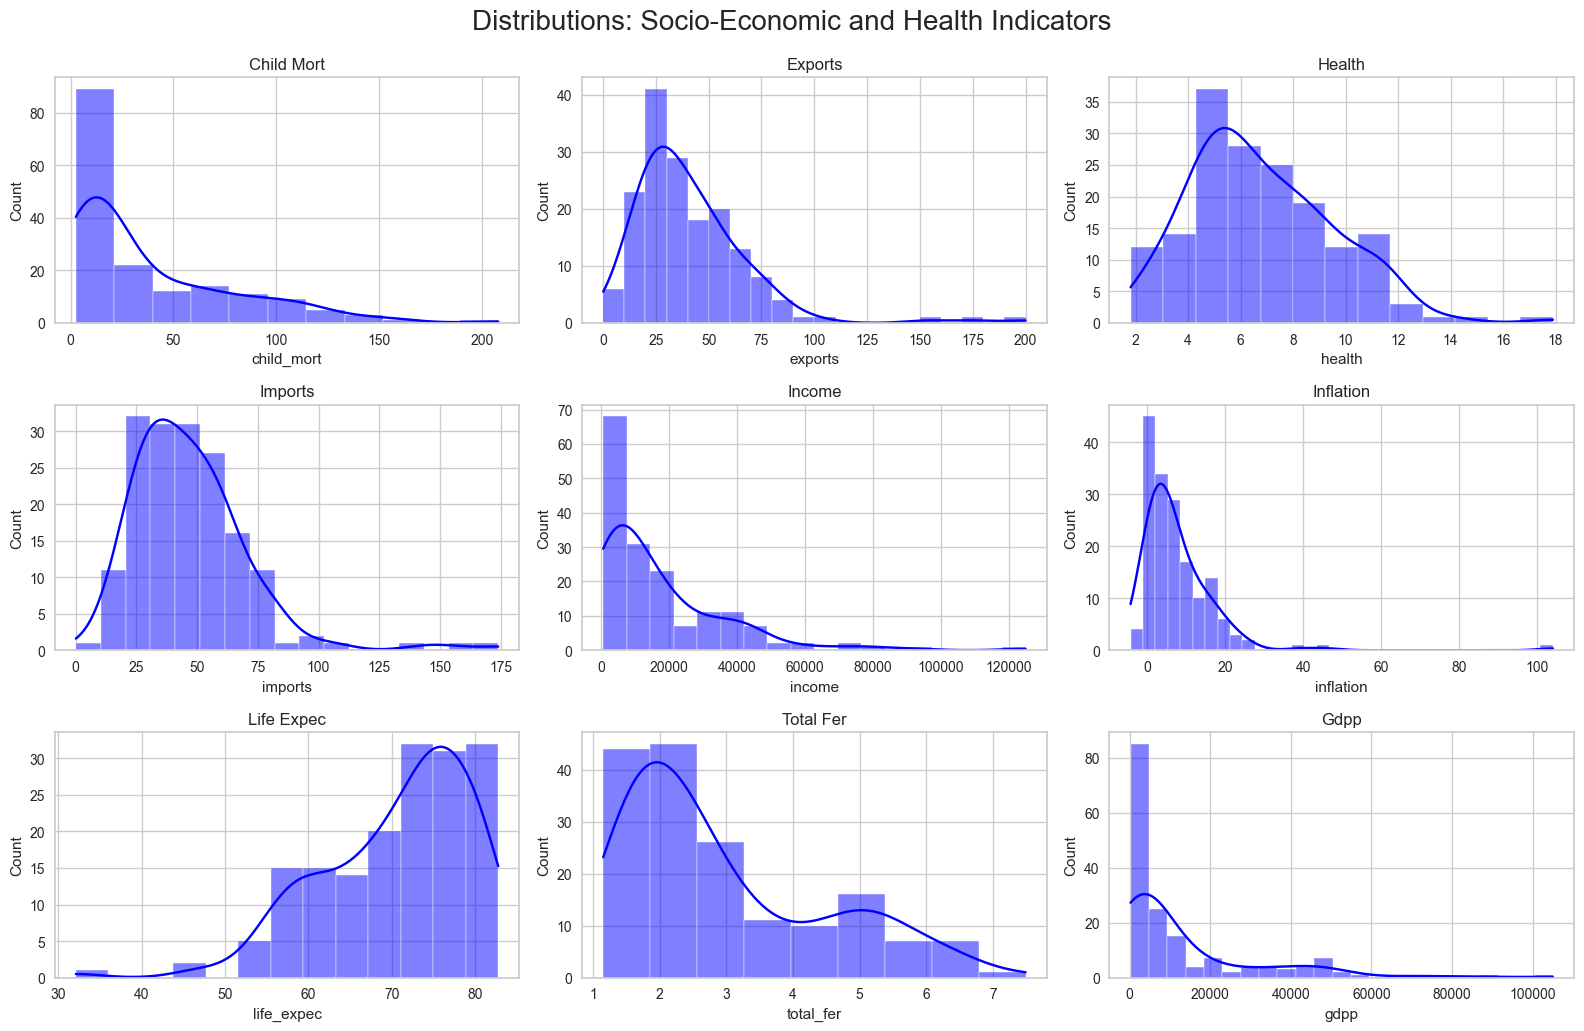

In [9]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid") 
# Create a figure to hold multiple plots
plt.figure(figsize=(16, 10)) 
# List of variables for plotting
variables = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# Plotting each variable in a subplot
for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i) 
    sns.histplot(df[var], kde=True, color='blue') 
    plt.title(var.replace('_', ' ').title()) 
    plt.tight_layout() 

plt.suptitle('Distributions: Socio-Economic and Health Indicators', fontsize=20, y=1.03)
#plt.savefig("Images/histograms.png")
plt.show()


The plots above displays the distribution of various socio-economic and health indicators for countries in the dataset. Each histogram is accompanied by a Kernel Density Estimate (KDE) curve, providing a smooth estimate of the distribution. 

*Here's a brief overview of what each plot reveals:*

- Child Mortality: Most countries have a low child mortality rate, but there's a long tail indicating some countries with very high rates.

- Exports & Imports: Both show a wide range of values, with many countries clustered at the lower end, indicating a concentration of countries with lower trade as a percentage of GDP.

- Health Spending: The distribution is skewed towards lower health spending as a percentage of GDP, with fewer countries spending a higher proportion.

- Income: This plot shows a wide disparity in income per person, with a concentration of countries at the lower end of the income spectrum.

- Inflation: Most countries have relatively low inflation rates, but there are outliers with very high inflation.

- Life Expectancy: The distribution shows a skew towards higher life expectancy, with fewer countries having very low life expectancy.

- Total Fertility Rate: There's a broad spread of fertility rates, with a tendency towards lower fertility rates in many countries.

- GDP per Capita (gdpp): Similar to income, there's a significant disparity in GDP per capita, with many countries concentrated at the lower end.

### Boxplots

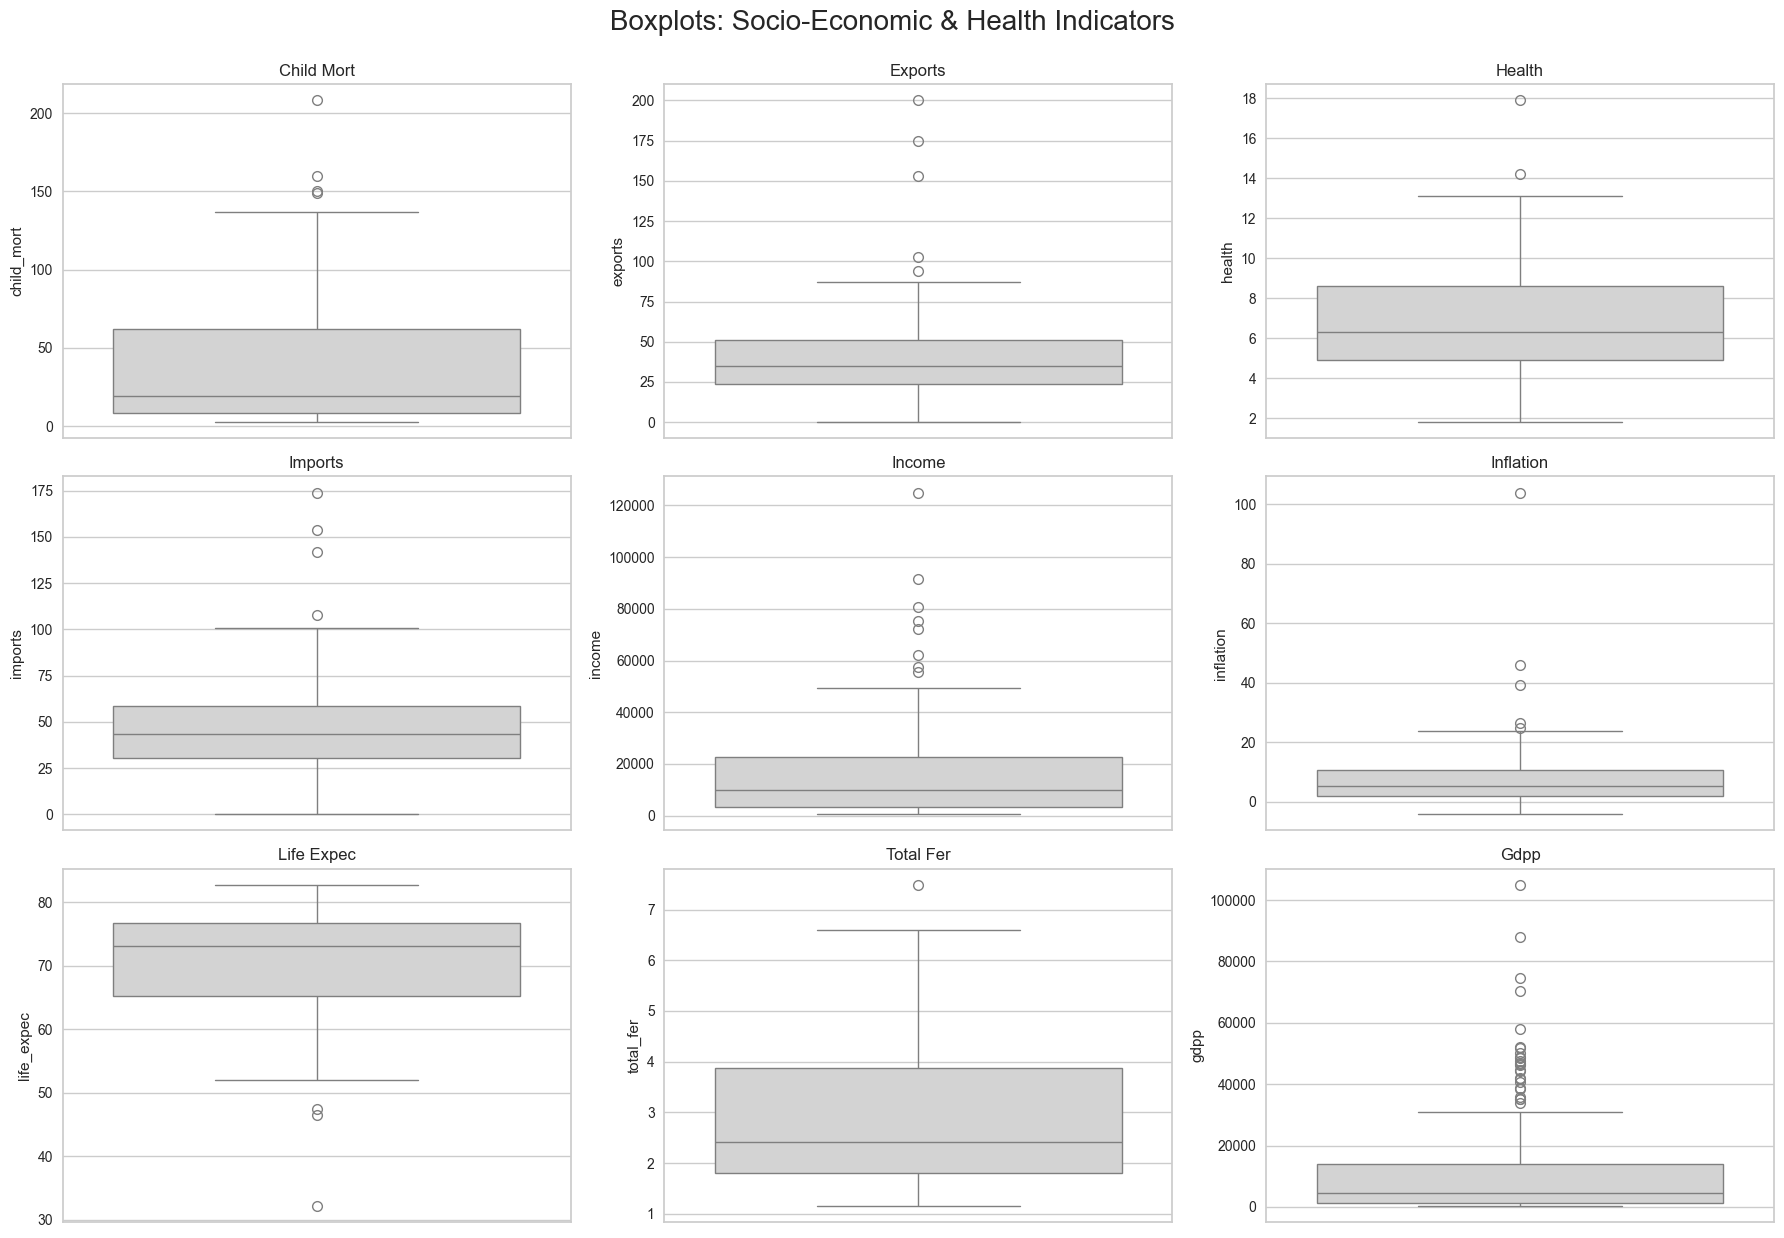

In [10]:
# Create a figure to hold multiple plots
plt.figure(figsize=(18, 12)) 
# Plotting each variable in a boxplot
for i, var in enumerate(variables, 1): 
    plt.subplot(3, 3, i) 
    sns.boxplot(y=df[var], color='lightgrey') 
    plt.title(var.replace('_', ' ').title()) 
    plt.tight_layout() 
    
plt.suptitle('Boxplots: Socio-Economic & Health Indicators', fontsize=20, y=1.03)
#plt.savefig("Images/boxplots.png")
plt.show()

Boxplots are particularly useful for identifying the median, quartiles, and outliers within each distribution.

*Here's a brief overview of what each plot reveals:*

- Child Mortality: There's a wide interquartile range, indicating significant variation in child mortality rates among countries. Numerous outliers suggest that some countries have exceptionally high child mortality rates.

- Exports & Imports: Both indicators have a relatively wide range but with many outliers, indicating that some countries have exceptionally high or low trade percentages relative to their GDP.

- Health Spending: The distribution shows a moderate range of health spending as a percentage of GDP, with a few countries spending significantly more, as indicated by outliers.

- Income: There's a large spread in income per person, with many outliers on the higher end, highlighting income disparity among countries.

- Inflation: Most countries have moderate inflation rates, but there are several outliers with extremely high inflation.

- Life Expectancy: The life expectancy across countries shows a skew towards higher values, but with outliers on both ends, indicating variations in health outcomes.

- Total Fertility Rate: The fertility rate shows variability among countries, with some outliers indicating very high fertility rates.

- GDP per Capita: Similar to income, there's a significant spread in GDP per capita with numerous outliers,highlighting economic disparities.

Overall, these boxplots underscore the disparities in health, economic, and demographic indicators across the countries, highlighting the range of conditions and challenges faced by different nations.

### Correlation matrix

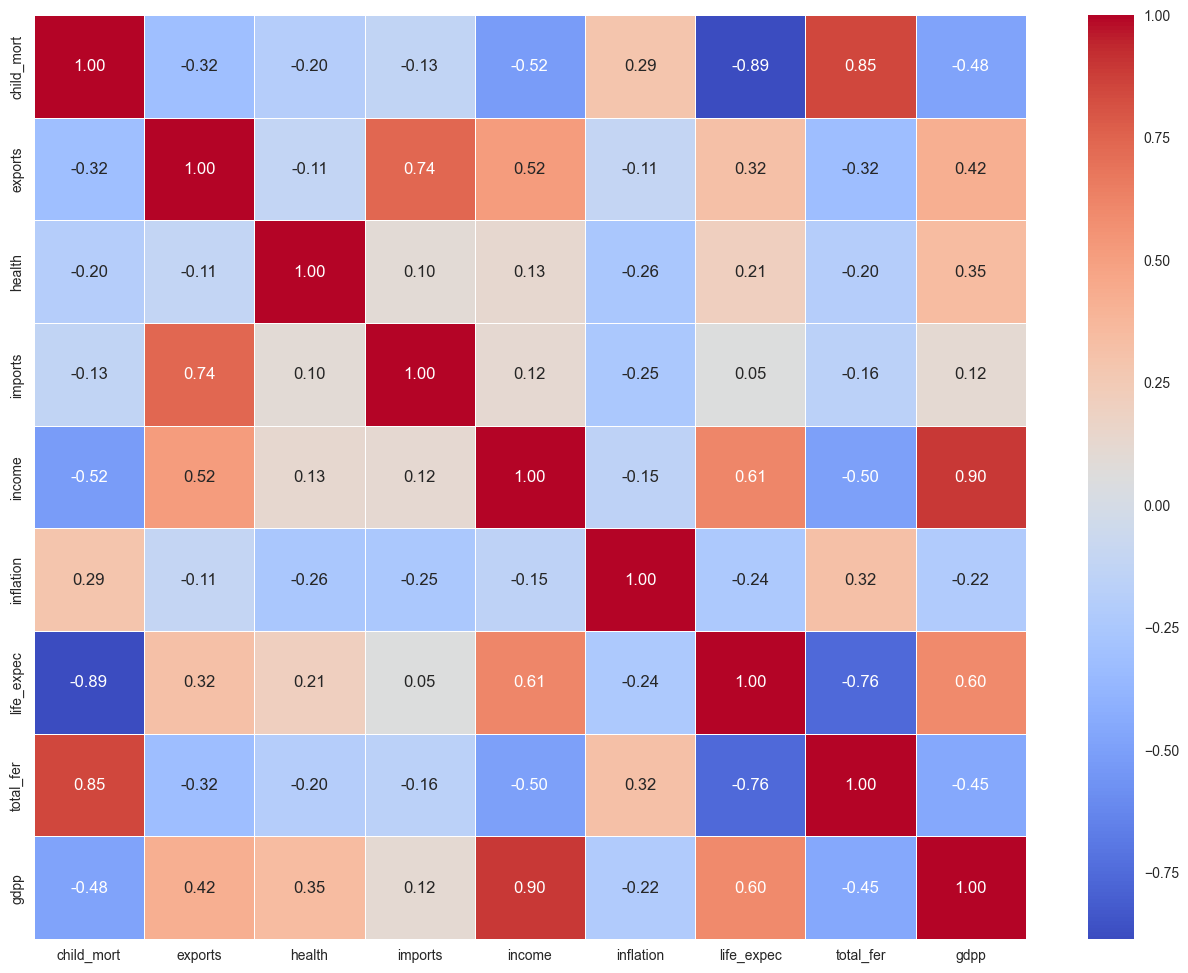

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.drop('country', axis=1).corr() 

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
#plt.savefig("Images/corr_matrix.png")
plt.show()

The heatmap above visualizes the correlation matrix of socio-economic and health indicators in the dataset. Each cell in the heatmap shows the correlation coefficient between two variables, ranging from -1 to 1. A coefficient close to 1 indicates a strong positive correlation, meaning that as one variable increases, the other tends to increase as well. A coefficient close to -1 indicates a strong negative correlation, where an increase in onevariable tends to be associated with a decrease in the other. Coefficients near 0 suggest little to no linear relationship between the variables. 

*Key insights from the correlation analysis include:*

- Income and GDP per Capita have a strong positive correlation with Life Expectancy (life_expec), indicatingthat higher income levels and economic output per person are associated with longer life spans.

- Child Mortality is negatively correlated with Life Expectancy, Income, and GDP per Capita, suggesting that as economic conditions improve, child mortality rates tend to decrease.

- Fertility Rate shows a strong negative correlation with Life Expectancy, Income, and GDP per Capita,consistent with the trend that higher fertility rates are often observed in countries with lower income and shorterlife expectancy.

- Health Spending as a percentage of GDP shows positive correlations with Income and GDP per Capita, indicating that wealthier countries tend to spend a higher proportion of their GDP on health.

These correlations can help identify the key drivers of health and economic outcomes outcomes across countries, guiding further analysis and policy interventions.

### Pair plot of correlations

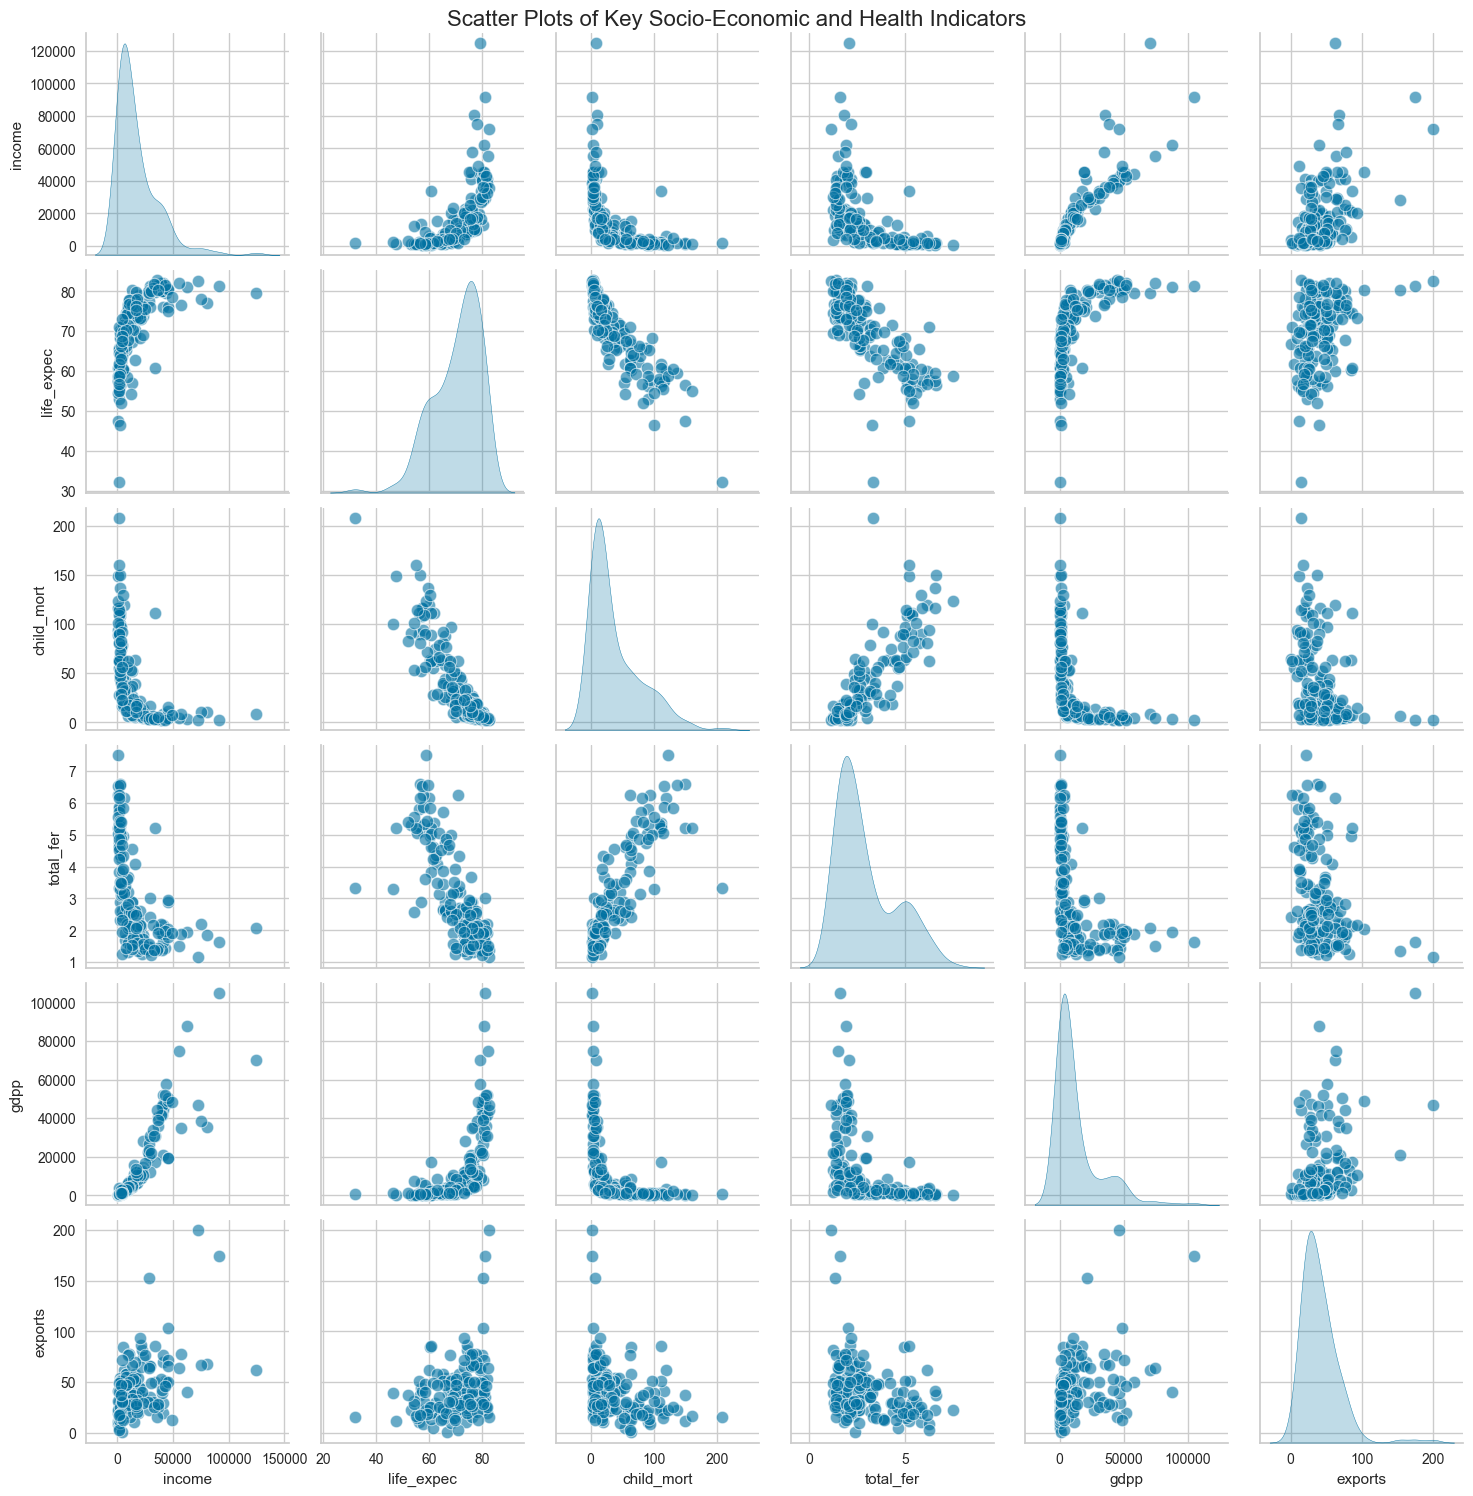

In [12]:
# Selecting a few key variables for scatter plots to visualize their relationships
variables_to_plot = ['income', 'life_expec', 'child_mort', 'total_fer', 'gdpp', 'exports'] 
# Create pair plot
sns.pairplot(df[variables_to_plot], diag_kind='kde', plot_kws={'alpha':0.6, 's':80})
plt.suptitle('Scatter Plots of Key Socio-Economic and Health Indicators', size=16, y=1.0)
#plt.savefig("Images/pairplot.png")
plt.show()

The scatter plots above illustrate the relationships between key socio-economic and health indicators for the countries in the dataset. Each plot pairs two variables, showing how they are related to each other across different countries.

*Here are some observations:*

- Income vs. Life Expectancy: There's a positive relationship, indicating that higher income per person is associated with longer life expectancy.

- Income vs. Child Mortality: A negative relationship is observed, suggesting that as income per person increases, child mortality rates tend to decrease.

- Income vs. Total Fertility Rate: Higher income levels tend to be associated with lower fertility rates.

- GDP per Capita vs. Life Expectancy and Exports: Similar to income, a higher GDP per capita is associated with longer life expectancy and increased exports.

- GDP per Capita vs. Child Mortality and Total Fertility Rate: GDP per capita shows a negative relationship with both child mortality and total fertility rate, echoing the patterns seen with income.

These patterns highlight the strong link between economic indicators and health outcomes. Wealthier countries,as measured by income and GDP per capita, typically have better health outcomes, evidenced by higher life expectancy, lower child mortality rates, and lower fertility rates. These visualisations underscore the interconnectedness of economic development and health providing valuable insights for policymakers.

##### Furthermore

Income, GDP and exports look to have a Polynomial relationship with life expectancy and will not work well in a linear regression model.

<Figure size 1600x1200 with 0 Axes>

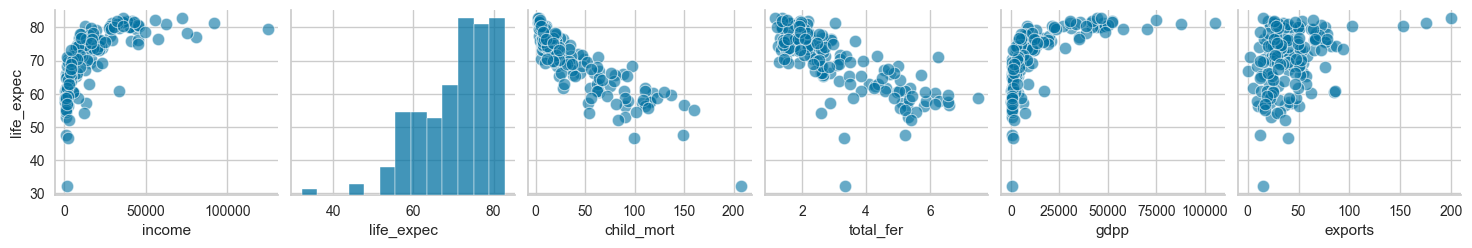

In [13]:
plt.figure(figsize=(16, 12))
sns.pairplot(df[variables_to_plot], y_vars='life_expec',plot_kws={'alpha':0.6, 's':80})
#plt.savefig("Images/focusedpairplot.png")
plt.show()

Here the variables have been plotted against life expectancy and the **non-linearity** is very clear for some of the relationships.

### Polynomial features to explore

The features that look like they have a polynomial relationship with the target variable (life expectancy):
    
    * GDP per capita
    * Exports
    * Income
    
##### GDPP first

In [14]:
X = df[['gdpp']]
y = df['life_expec']

# split the data into training and testing spil to avoid overfitting higher degree polynomial functions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# build an evenly spaced amount of data from X min to X max to build a smooth line with the polynomial
X_plot = pd.DataFrame(np.linspace(X.min()[0], X.max()[0], 1000), columns=['x'])

# build the polynomial feature of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# fit median age to the degree 2 polynomial
X_train_poly = poly.fit_transform(X_train)

# put the new data into a data frame and visualise
X_train_poly = pd.DataFrame(data=X_train_poly, columns=poly.get_feature_names_out())
X_train_poly.head()

,gdpp,gdpp^2
0,9070.0,82264900.0
1,20700.0,428490000.0
2,662.0,438244.0
3,708.0,501264.0
4,3220.0,10368400.0


In [15]:
# define a function that will fit a polynomial function to the data and visualise it
def fit_polynomial(degree, feature):
    # Print message with polynomial
    print(f'Polynomial of degree {degree}')
        
    # Create polynomial features and transform variables
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    X_plot_poly = poly.fit_transform(X_plot)

    # Define and train linear regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)
    
    # Generate predictions
    train_preds = lin_reg.predict(X_train_poly)
    test_preds = lin_reg.predict(X_test_poly)
    plot_preds = lin_reg.predict(X_plot_poly)
    
    # Calculate and print the MAE for train and test
    train_mae = round(mean_absolute_error(y_train, train_preds),4)
    test_mae = round(mean_absolute_error(y_test, test_preds),4)
    print('Train MAE:', train_mae)
    print('Test MAE:', test_mae)
    print()

    # Plot the regression line using X_plot and the predictions generated for the transformed X_plot
    sns.lineplot(x=X_plot['x'], y=plot_preds, label=f'Degree {degree}')
    
    # Plot the training and testing data
    sns.scatterplot(x=X_train[str(feature)], y=y_train)
    sns.scatterplot(x=X_test[str(feature)], y=y_test)

Polynomial of degree 1
Train MAE: 5.7498
Test MAE: 5.6644



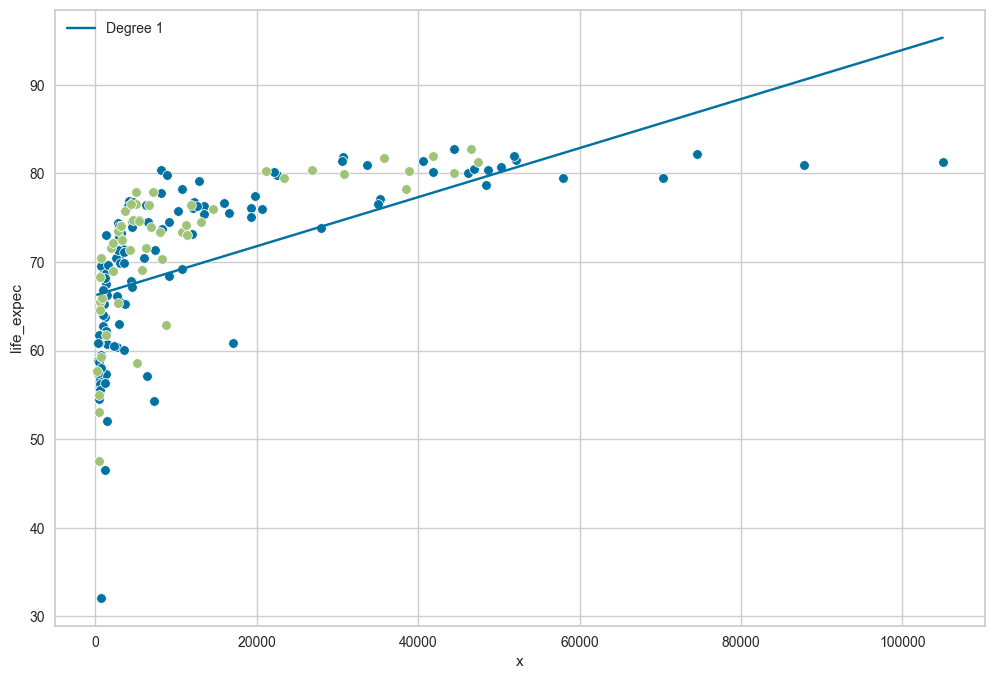

In [16]:
plt.figure(figsize=(12, 8))
fit_polynomial(1, 'gdpp')
#plt.savefig("Images/poly1.png")

Polynomial of degree 2
Train MAE: 5.0694
Test MAE: 4.8996



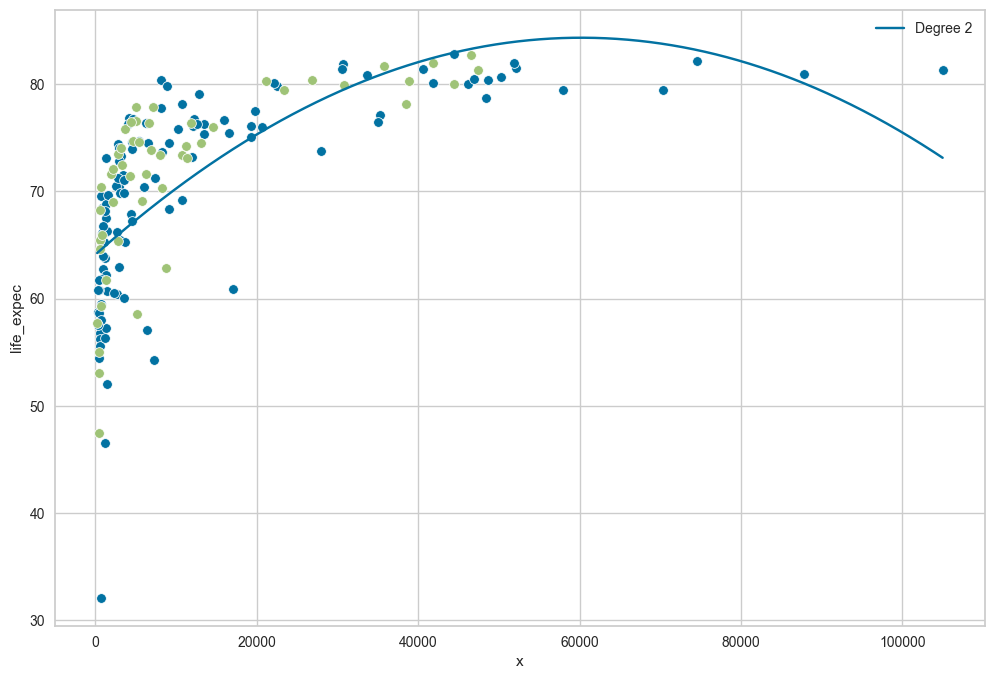

In [17]:
plt.figure(figsize=(12, 8))
fit_polynomial(2, 'gdpp')
#plt.savefig("Images/poly2.png")

In [18]:
X = df[['income']]
y = df['life_expec']

# split the data into training and testing spil to avoid overfitting higher degree polynomial functions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# build an evenly spaced amount of data from X min to X max to build a smooth line with the polynomial
X_plot = pd.DataFrame(np.linspace(X.min()[0], X.max()[0], 1000), columns=['x'])

# build the polynomial feature of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# fit median age to the degree 2 polynomial
X_train_poly = poly.fit_transform(X_train)

# put the new data into a data frame and visualise
X_train_poly = pd.DataFrame(data=X_train_poly, columns=poly.get_feature_names_out())
X_train_poly.head()

,income,income^2
0,21100.0,4.452100e+08
1,41100.0,1.689210e+09
2,1500.0,2.250000e+06
3,1870.0,3.496900e+06
4,6700.0,4.489000e+07


Polynomial of degree 1
Train MAE: 5.7199
Test MAE: 5.5917



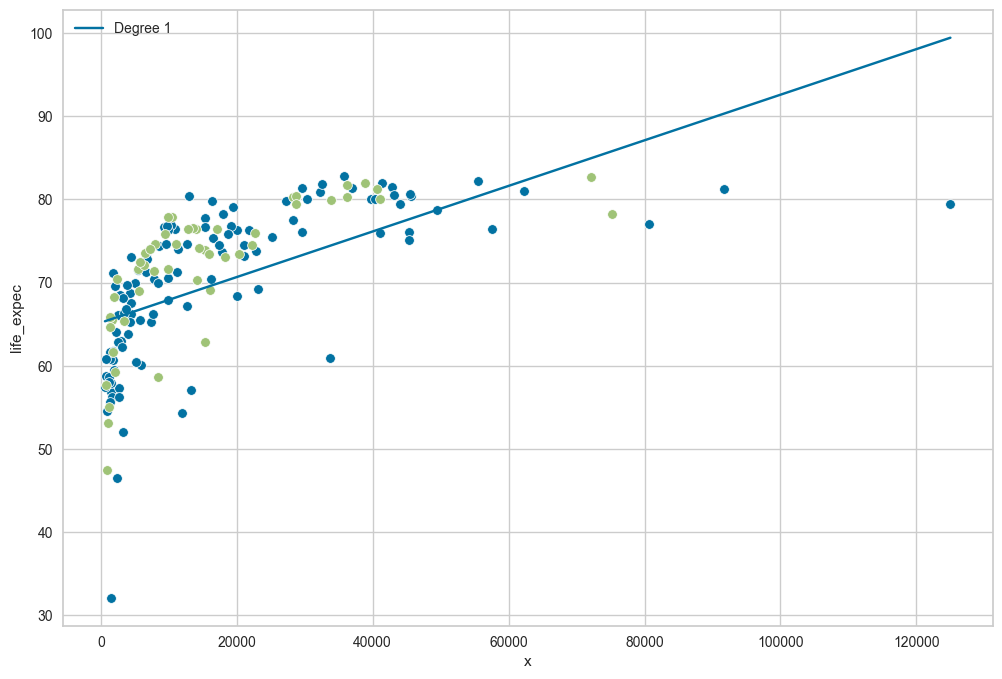

In [19]:
plt.figure(figsize=(12, 8))
fit_polynomial(1, 'income')

Polynomial of degree 2
Train MAE: 4.689
Test MAE: 4.5831



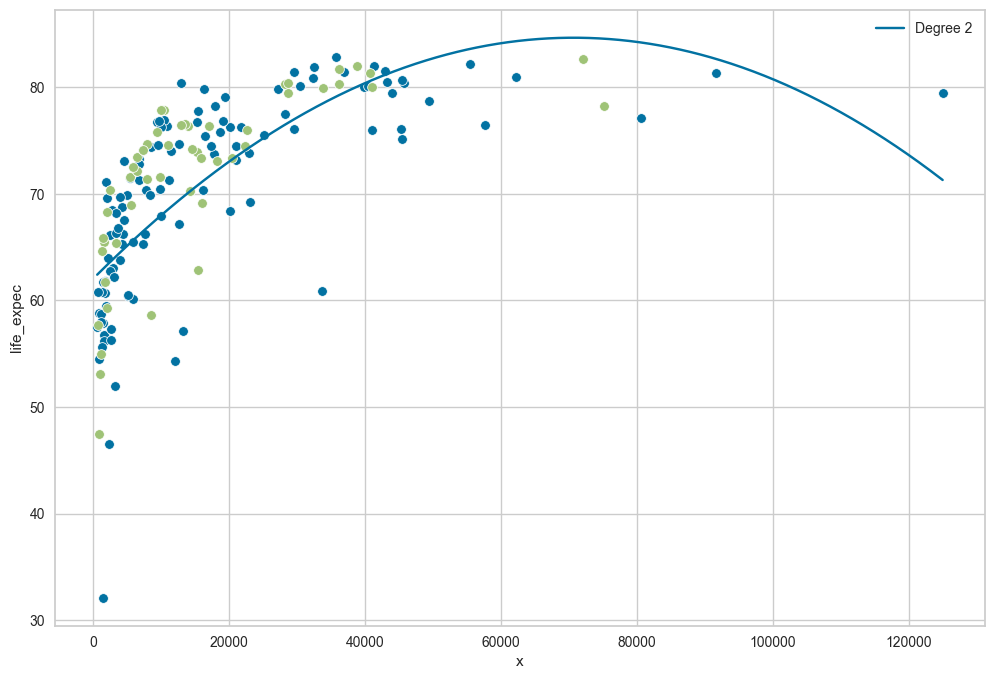

In [20]:
plt.figure(figsize=(12, 8))
fit_polynomial(2, 'income')

In [21]:
X = df[['exports']]
y = df['life_expec']

# split the data into training and testing spil to avoid overfitting higher degree polynomial functions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# build an evenly spaced amount of data from X min to X max to build a smooth line with the polynomial
X_plot = pd.DataFrame(np.linspace(X.min()[0], X.max()[0], 1000), columns=['x'])

# build the polynomial feature of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# fit median age to the degree 2 polynomial
X_train_poly = poly.fit_transform(X_train)

# put the new data into a data frame and visualise
X_train_poly = pd.DataFrame(data=X_train_poly, columns=poly.get_feature_names_out())
X_train_poly.head()

,exports,exports^2
0,86.9,7551.61
1,69.5,4830.25
2,15.3,234.09
3,22.8,519.84
4,20.8,432.64


Polynomial of degree 1
Train MAE: 7.228
Test MAE: 5.7897



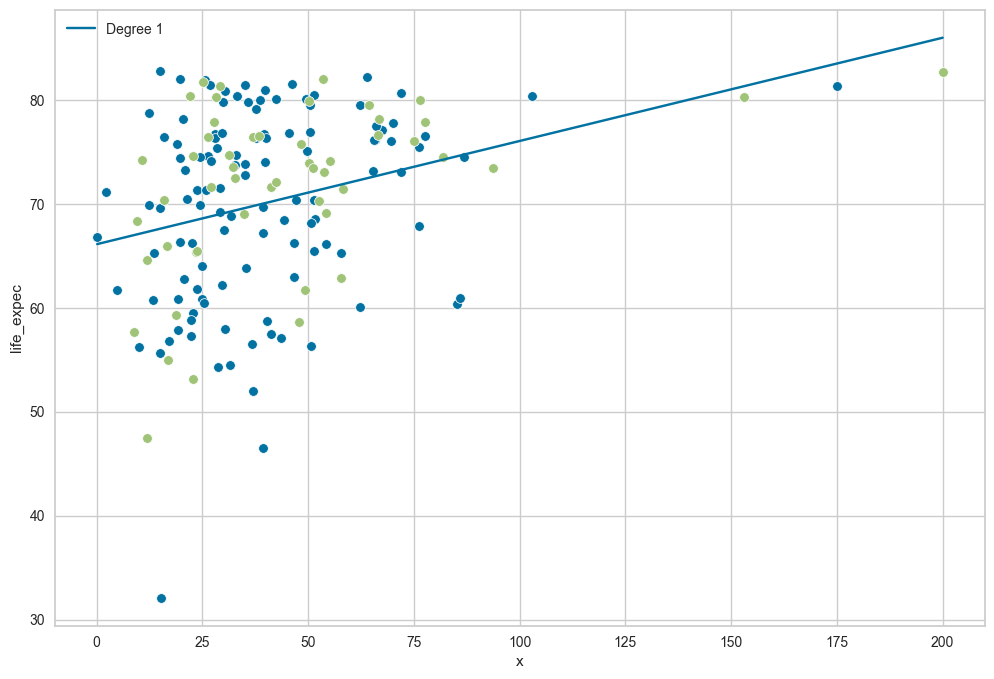

In [22]:
plt.figure(figsize=(12, 8))
fit_polynomial(1, 'exports')

Polynomial of degree 2
Train MAE: 7.2161
Test MAE: 5.7032



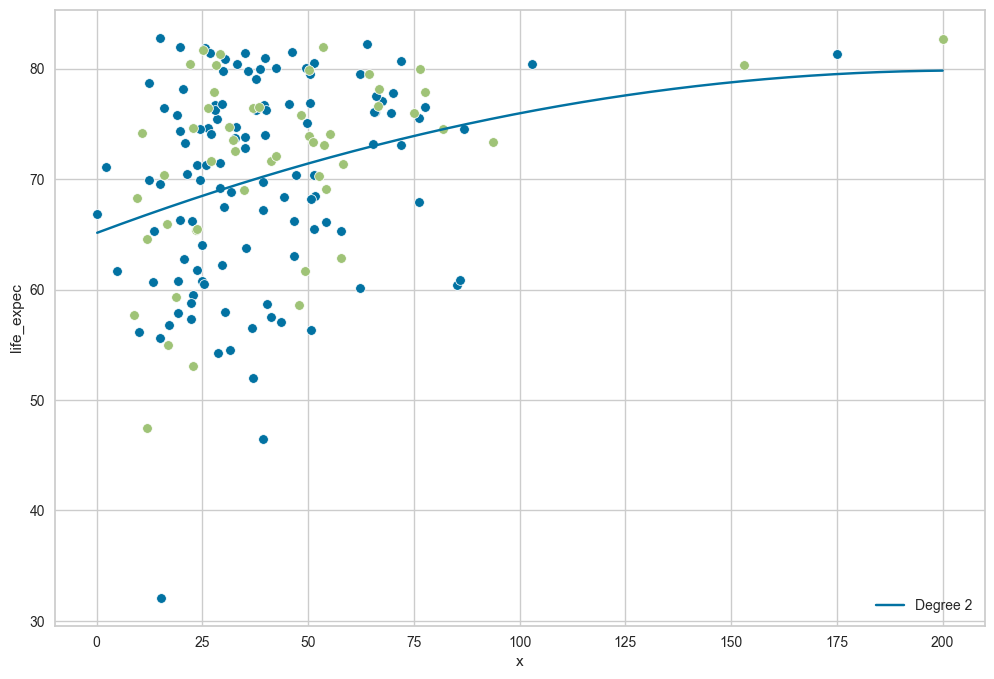

In [23]:
plt.figure(figsize=(12, 8))
fit_polynomial(2, 'exports')

**Now lets store these features in the dataframe for later use**

In [24]:
poly = PolynomialFeatures(degree=2, include_bias=False)
Export_poly = poly.fit_transform(df['exports'].to_numpy().reshape(-1,1))
Income_poly = poly.fit_transform(df['income'].to_numpy().reshape(-1,1))
GDP_poly = poly.fit_transform(df['gdpp'].to_numpy().reshape(-1,1))

Export_poly = pd.DataFrame(Export_poly, columns=["exports1", "exports2"])
Income_poly = pd.DataFrame(Income_poly, columns=["income1", "income2"])
GDP_poly = pd.DataFrame(GDP_poly, columns=["GDP1", "GDP2"])

# Regression analysis

### Data prep

In [25]:
X = df.drop(columns=['life_expec', 'country'])
y = df['life_expec']

In [26]:
# OLS does not generate a constant, so we will add a constat to the X data frame
X = sm.add_constant(X)

In [27]:
# fit the OLS model to the data
result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             life_expec   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     97.61
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           3.69e-57
Time:                        12:57:30   Log-Likelihood:                -452.60
No. Observations:                 167   AIC:                             923.2
Df Residuals:                     158   BIC:                             951.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.1205      1.513     50.966      0.0

### Remove features

We can see that a number of features have extremely high p-values. The first round is focused on cutting all p-values above 0.6.
This method is called step-wise deletion. A backward-elimination rule strting with all possible explanatory varibales and then discarding the least statistically significant variables one-by-one.

In [28]:
X = X.drop(['total_fer', 'health', 'inflation', 'income'], axis=1)

In [29]:
result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             life_expec   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     199.7
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           1.60e-61
Time:                        12:57:30   Log-Likelihood:                -452.74
No. Observations:                 167   AIC:                             915.5
Df Residuals:                     162   BIC:                             931.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.9600      0.794     96.982      0.0

In [30]:
X = X.drop(['exports'], axis=1)
result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             life_expec   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     264.8
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           2.00e-62
Time:                        12:57:30   Log-Likelihood:                -453.56
No. Observations:                 167   AIC:                             915.1
Df Residuals:                     163   BIC:                             927.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.9796      0.795     96.849      0.0

I am happy with this model as its maintained a 0.83 R-squared, although the model is suggesting multicollinearity within the data. However, the final model only contains child imortality, imports and GDP per capita, all features which do not have intricate dependencies that would affect the independance and interpretation of the coefficient.

*Now let's understand what the model is telling us*

The following features have a positive impact on the model outcome, suggesting that as this feature is increased, the model predicts a higher life expectancy:

- **GDP per capita**

The following features have a negative impact on the model outcome, suggesting that as these features are increased, the model predicts a lower life expectancy:

- **Infant Mortality**
- **Imports**

### Polynomial features

Now lets at those use polynomial features to model the curves in the data.

In [31]:
# adding the polynominal features to the dataframe
X = df.drop(columns=['life_expec', 'country'])
y = df['life_expec']

X = pd.concat([X, Export_poly], axis=1, join="inner")
X = pd.concat([X, Income_poly], axis=1, join="inner")
X = pd.concat([X, GDP_poly], axis=1, join="inner")

In [32]:
#Drop original features
X = X.drop(columns = ['exports', 'income', 'gdpp'])

In [33]:
X = sm.add_constant(X)

In [34]:
result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             life_expec   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     76.25
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           9.71e-57
Time:                        12:57:30   Log-Likelihood:                -446.26
No. Observations:                 167   AIC:                             916.5
Df Residuals:                     155   BIC:                             953.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.9339      1.768     44.074      0.0

In [35]:
X = X.drop(['total_fer', 'income2', 'income1'], axis=1)
result = sm.OLS(y, X).fit()

# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             life_expec   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     105.3
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           2.51e-59
Time:                        12:57:30   Log-Likelihood:                -447.28
No. Observations:                 167   AIC:                             912.6
Df Residuals:                     158   BIC:                             940.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.5112      1.408     55.055      0.0

In [36]:
X = X.drop(['health', 'inflation'], axis=1)
result = sm.OLS(y, X).fit()

# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             life_expec   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           2.12e-61
Time:                        12:57:30   Log-Likelihood:                -447.48
No. Observations:                 167   AIC:                             909.0
Df Residuals:                     160   BIC:                             930.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.4564      1.171     66.151      0.0

In [37]:
X = X.drop(['exports1'], axis=1)
result = sm.OLS(y, X).fit()

# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             life_expec   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     169.8
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           2.71e-62
Time:                        12:57:30   Log-Likelihood:                -448.07
No. Observations:                 167   AIC:                             908.1
Df Residuals:                     161   BIC:                             926.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.8772      1.038     74.087      0.0

In this model we are seeing a slight increase in R-squared: 0.84.
There is multicollinearity possibly be due to GDP2, so lets remove that.

In [38]:
X = X.drop(['GDP2'], axis=1)
result = sm.OLS(y, X).fit()

# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             life_expec   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     203.7
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           4.26e-62
Time:                        12:57:30   Log-Likelihood:                -451.37
No. Observations:                 167   AIC:                             912.7
Df Residuals:                     162   BIC:                             928.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.0604      0.944     82.714      0.0

This model has reduced to 0.834 R-squared, however the features are accurately measured.

##### *Interpreting the model*

Regression analysis that uses polynomials to model curvature can make interpreting the results trickier. Unlike a linear relationship, the effect of the independent variable changes based on its value. Looking at the coefficients won’t make the picture any clearer. Instead, graph the data to truly understand the relationship. Expert knowledge of the study area can also help you make sense of the results.

**From what we know of our datas relationships we can now say this:**

The following features have a positive impact on the model outcome, suggesting that as this feature is increased, the model predicts a higher life expectancy:

- **GDP per capita**
- **Exports**

The following features have a negative impact on the model outcome, suggesting that as these features are increased, the model predicts a lower life expectancy:

- **Infant Mortality**
- **Imports**

## Prediction time

In [39]:
# Hypothetical new data for prediction
new_data = pd.DataFrame({'child_mort': [10, 20, 8],
                         'imports': [50, 100, 20],
                        'exports2': [1000, 50, 3000],
                        'GDP1': [10500, 20600, 30500]})
new_data = sm.add_constant(new_data)

In [40]:
# Initializing and fitting the linear regression model
result = sm.OLS(y, X).fit()

# Predicting on the new data 
y_pred = result.predict(new_data)

In [41]:
# applying the model above onto the new data
result.get_prediction(new_data).summary_frame(alpha=0.05) # alpha = significance level for confidence interval

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,74.757223,0.413147,73.941375,75.573071,67.472200,82.042246
1,70.982902,1.256516,68.501641,73.464163,63.330281,78.635524
2,79.053352,0.612117,77.844594,80.262110,71.713934,86.392769


In [42]:
# Displaying the predictions
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted Life Expectancy'])
print(y_pred_df)

   Predicted Life Expectancy
0                  74.757223
1                  70.982902
2                  79.053352


Assuming we have a new data for GDP per capita, child mortality, exports and income, which we want to use to predict life expectancy. 

The new data should be structured in the same format as the data used to train the model.

The output will be a DataFrame with the predicted life expectancy for each row of new data provided. These predictions are based on the relationships the model has learned between the predictors (gdpp, child_mort, exports, income) and the outcome (life expectancy) from the training data.

## Predicting with linear regression

The last part was to see how the model would perform as a predictor using sci-kit learn. A train/test split was done, and then a regression was applied. 

The residuals were observed:

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

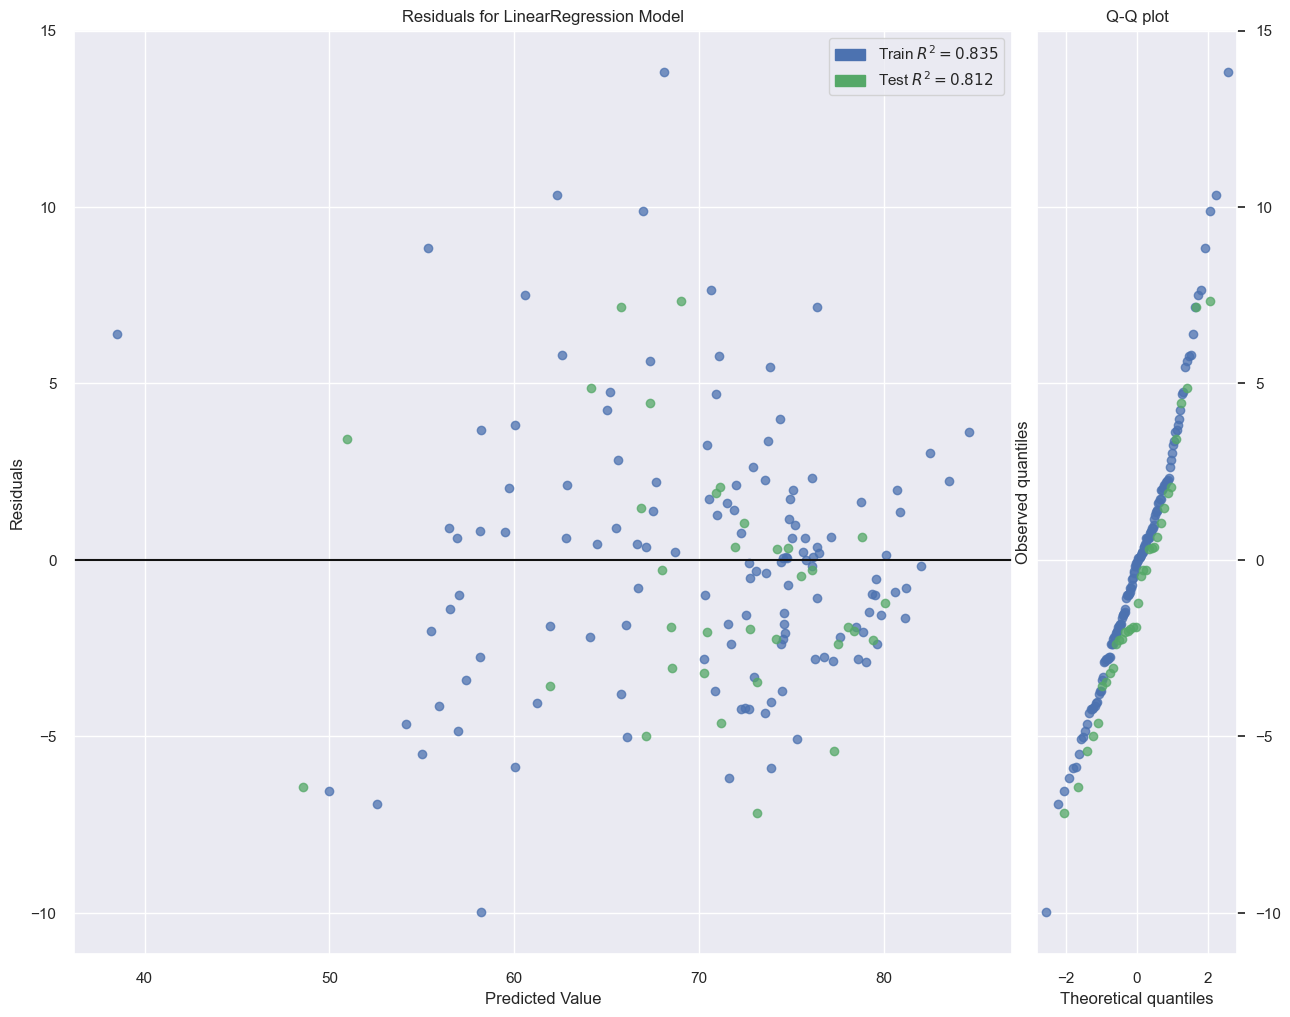

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [44]:
sns.set(rc = {'figure.figsize':(15,12)})
model = LinearRegression()
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

/Users/em8g14/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


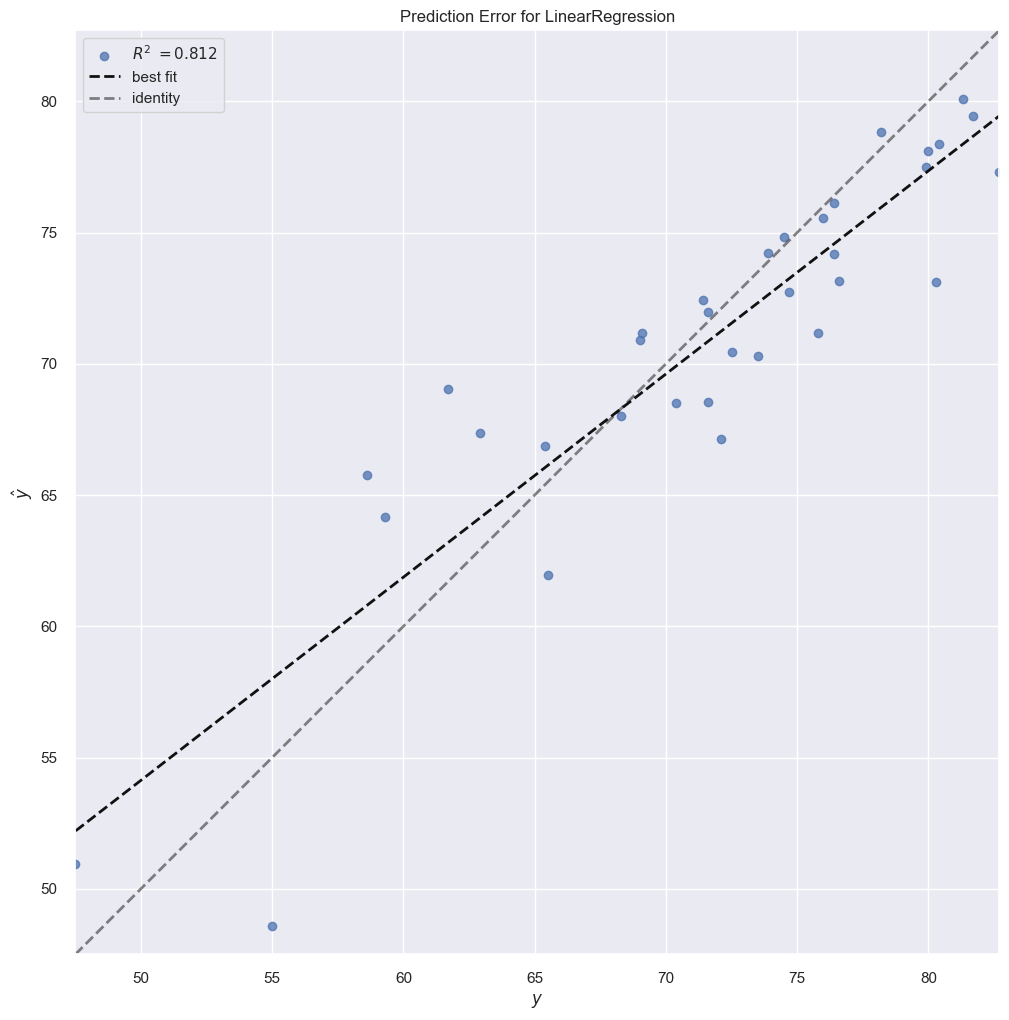

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [45]:
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

## Ridge Regularisation

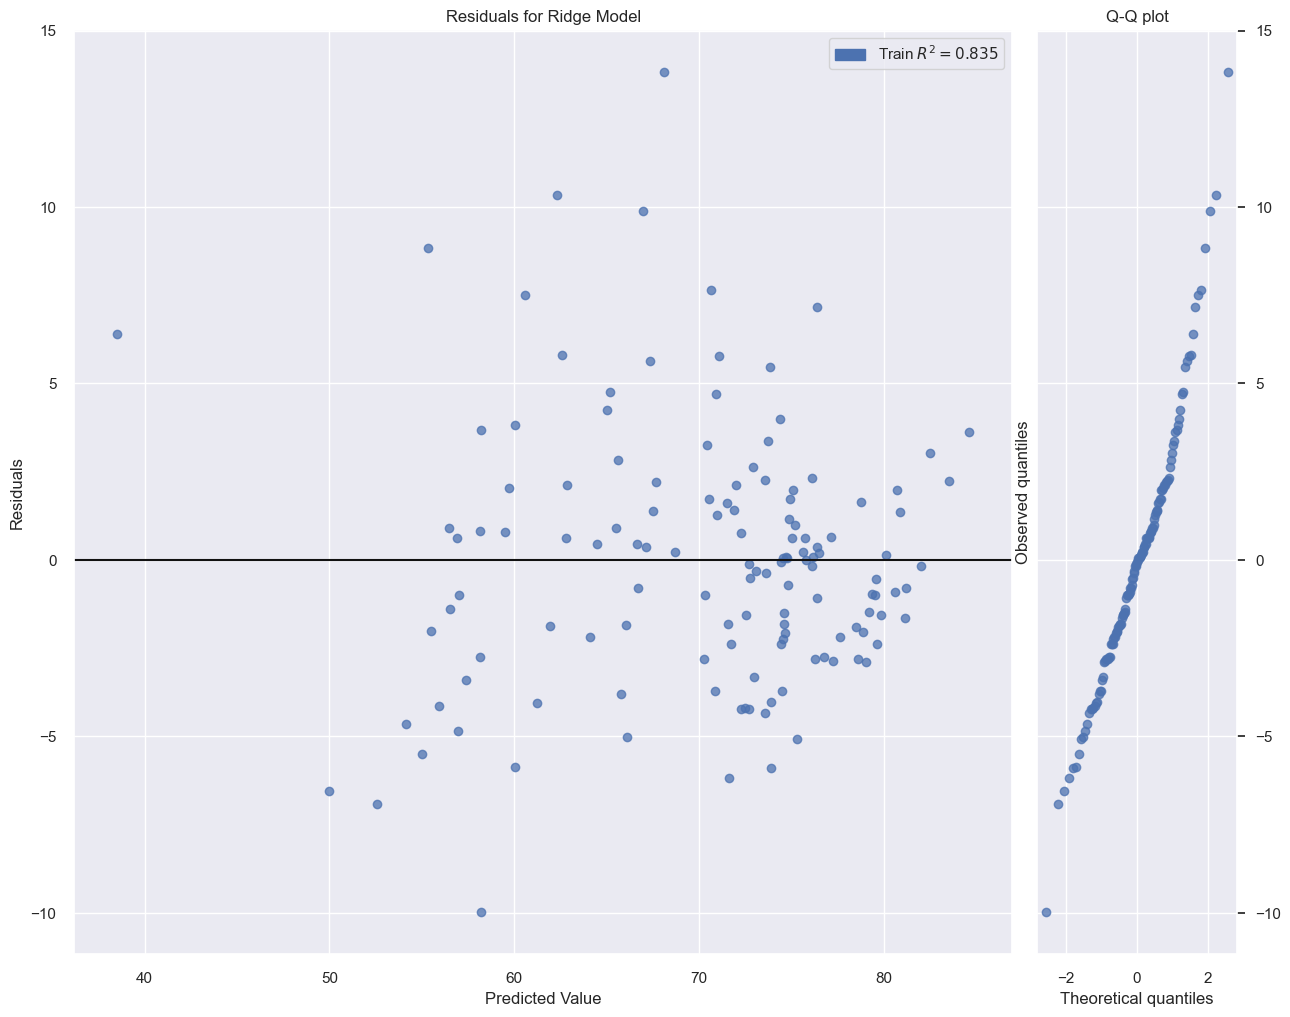

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [46]:
model = Ridge()
visualizer_residuals = ResidualsPlot(model, hist=False, qqplot=True)
visualizer_residuals.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer_residuals.show()

/Users/em8g14/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


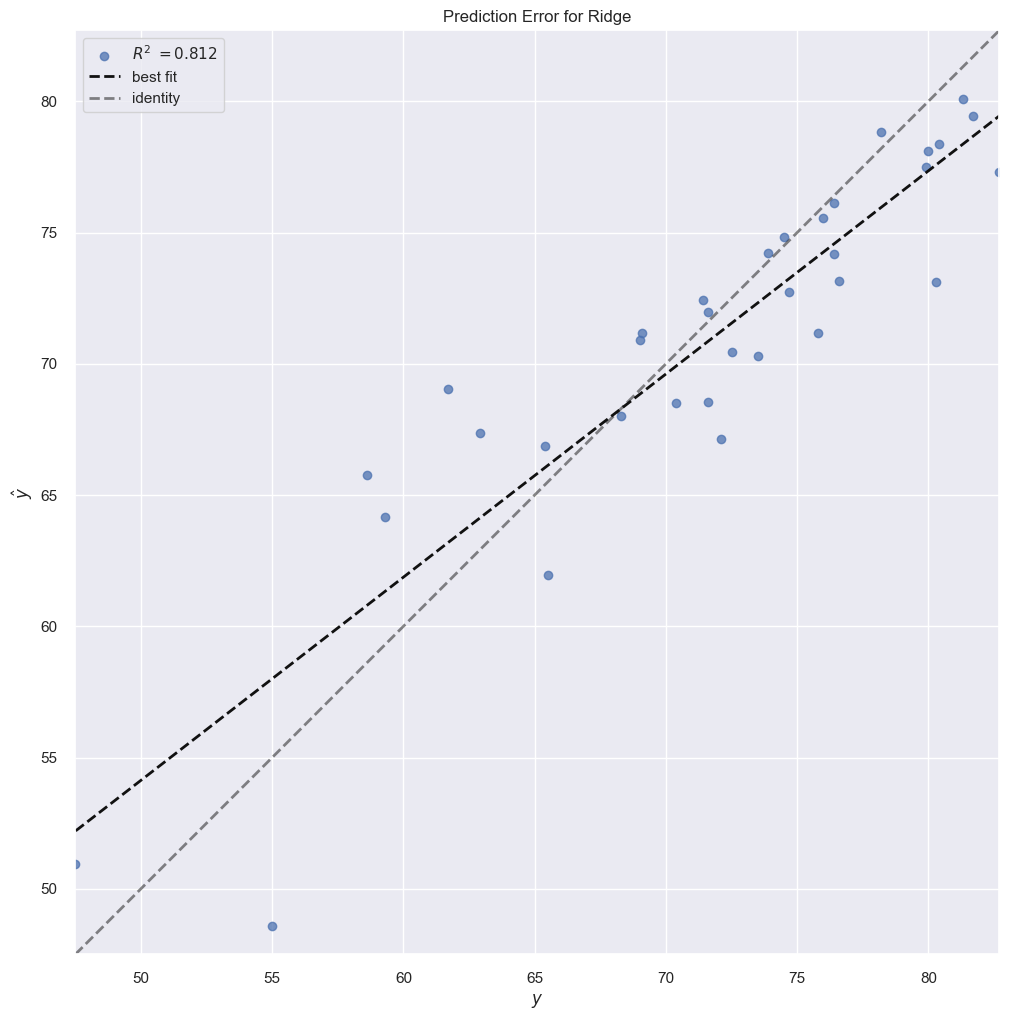

<Axes: title={'center': 'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [47]:
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Lasso Regularisation

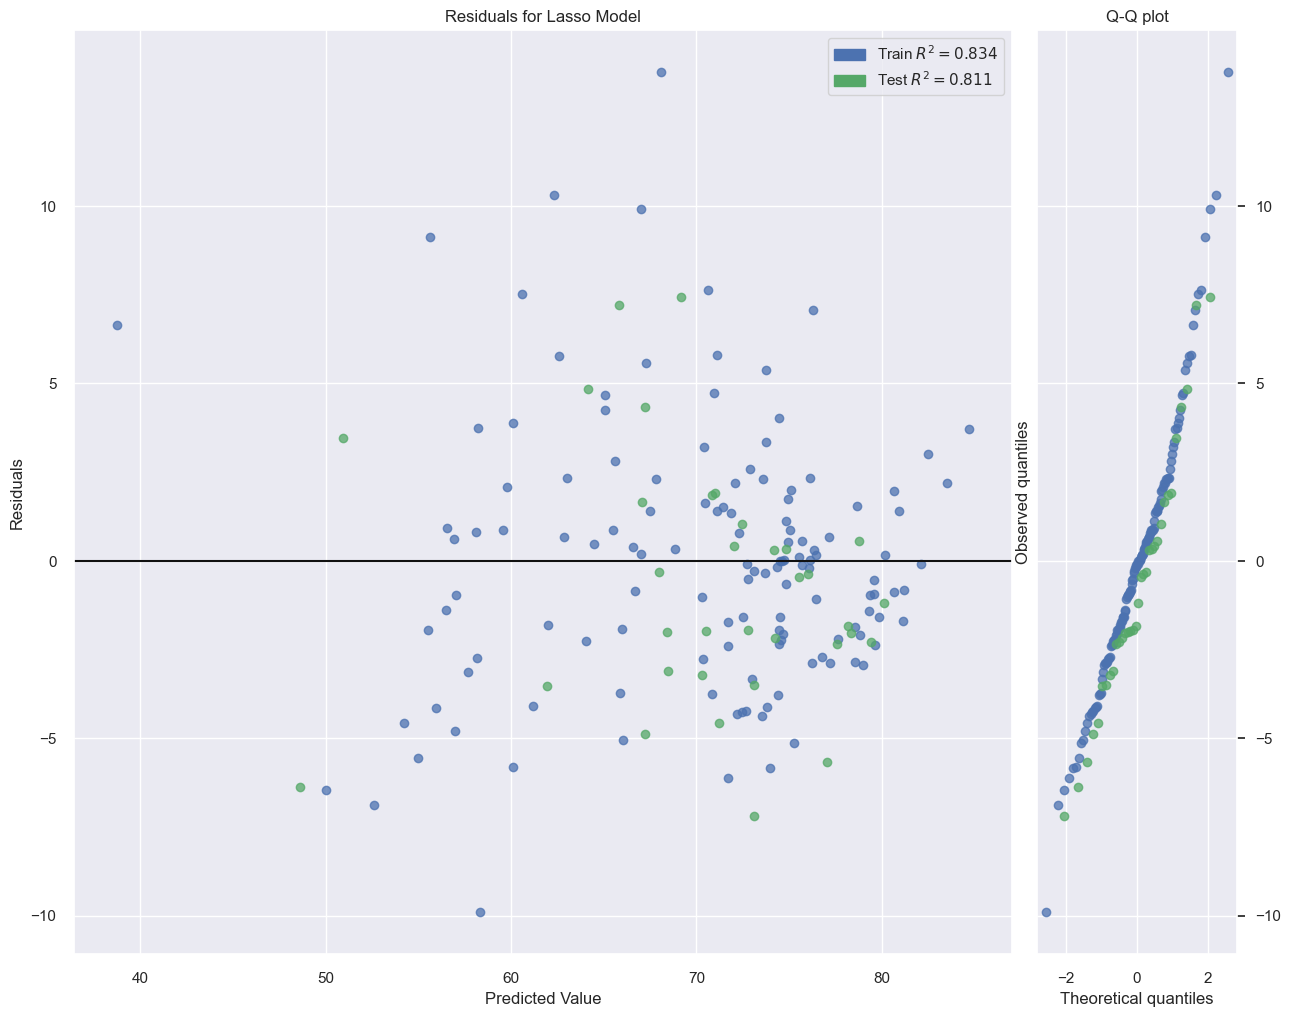

<Axes: title={'center': 'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [48]:
model = Lasso()
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

/Users/em8g14/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


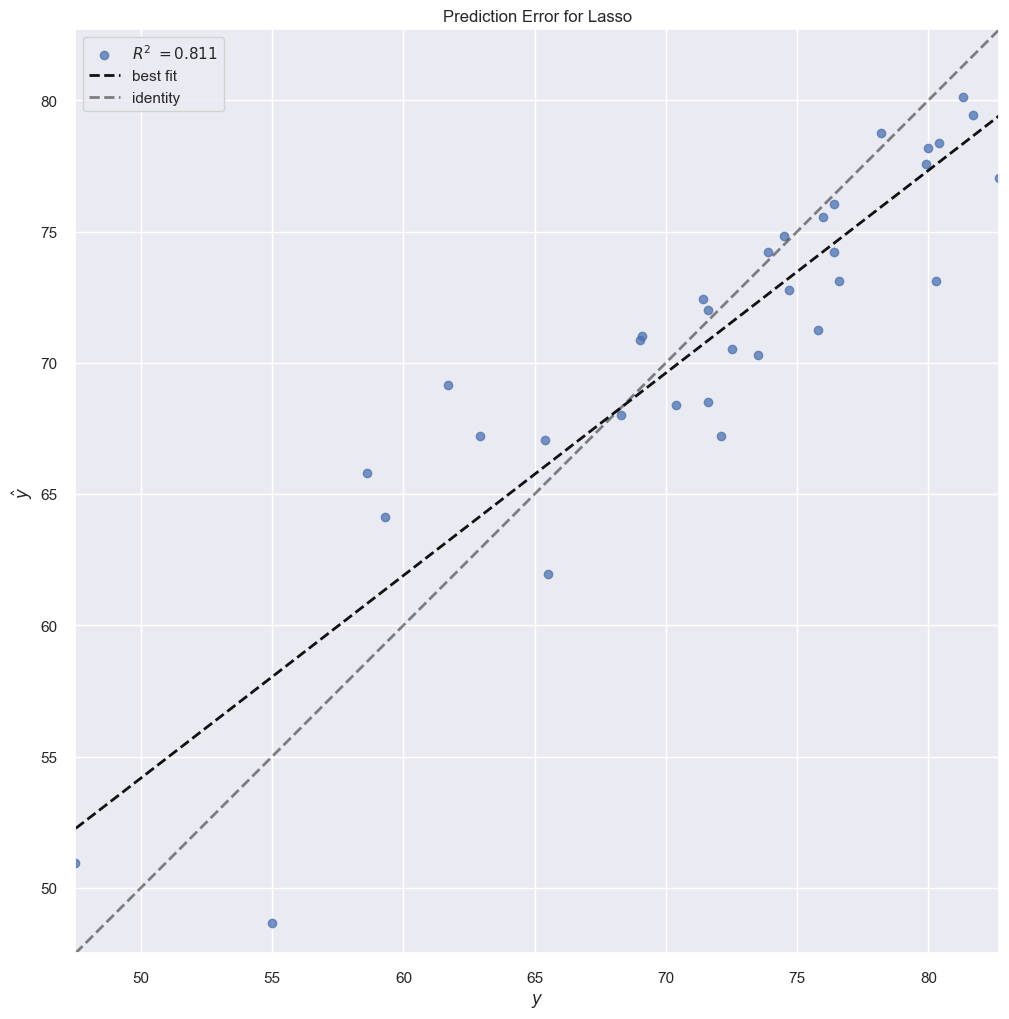

<Axes: title={'center': 'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [49]:
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

### Principal component analysis - PCA

PCA is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

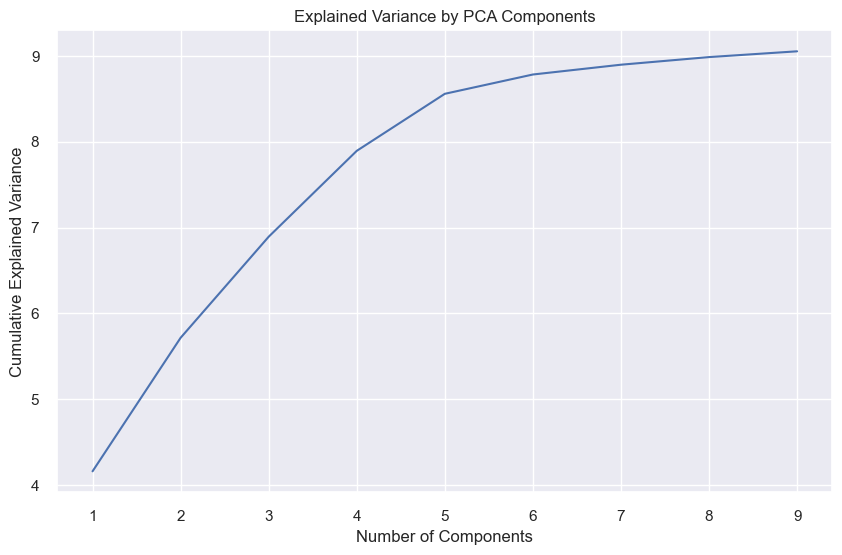

In [50]:
# Dropping the 'country' column for PCA analysis
country_data_numeric = df.drop('country', axis=1) 
# Standardizing the data (mean=0, std=1) since PCA's output is influenced based on the s
scaler = StandardScaler()
country_data_standardized = scaler.fit_transform(country_data_numeric) 

# Applying PCA
pca = PCA()
pca.fit(country_data_standardized) 

# Plotting the explained variance by each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_))
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
#plt.savefig("Images/PCAcomponents.png")
plt.show()

The plot above shows the cumulative explained variance by the principal components derived from the PCA of the dataset. The x-axis represents the number of components and the y-axis represents the cumulative explained variance as a percentage of the total variance.

This visualization helps to determine how many principal components should be retained to capture a significant portion of the variance in the data. Ideally, you want to choose the smallest number of principal components that still captures a large proportion of the total variance.

From the plot, we can observe that the first few components already explain a substantial amount of the total variance. This suggests that these components capture the majority of the information in the dataset, allowing for dimensionality reduction without losing significant information. The curve starts to plateau as more components are added, indicating that each additional component contributes less to the explained variance.

For further analysis, we might select the number of components at the point where the incremental explainedvariance begins to diminish significantly, often referred to as the "elbow" of the plot. This approach helps inreducing the dimensionality of the data while retaining most of the variability present in the original dataset.

### Clustering analysis

/Users/em8g14/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


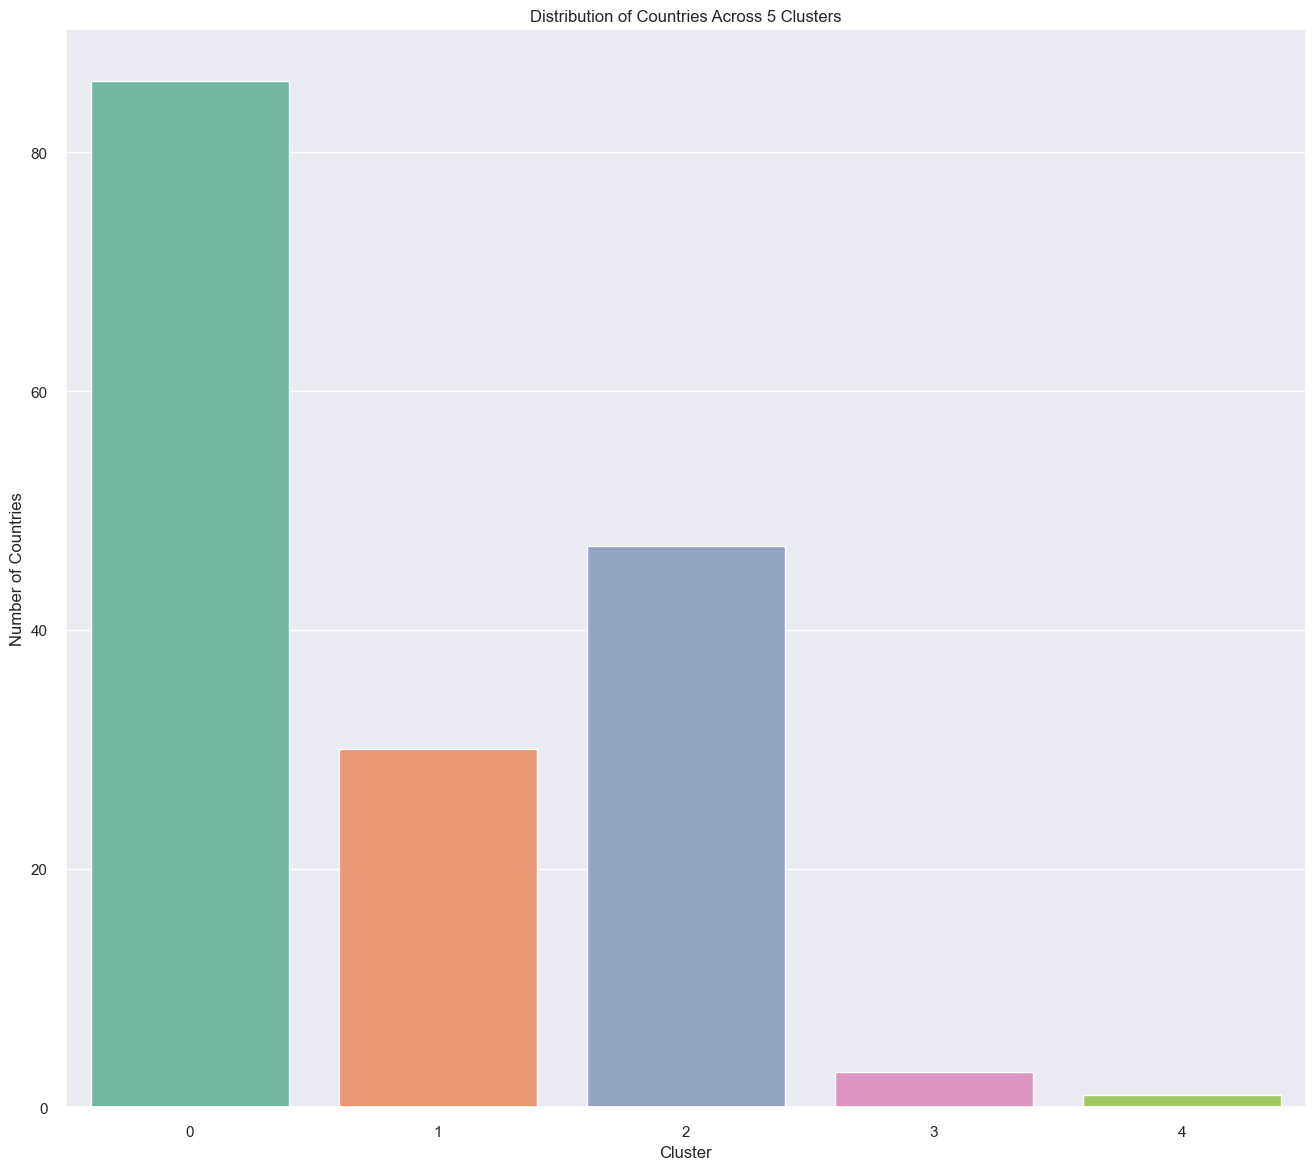

,country,Cluster
0,Afghanistan,2
1,Albania,0
2,Algeria,0
3,Angola,2
4,Antigua and Barbuda,0
5,Argentina,0
6,Armenia,0
7,Australia,1
8,Austria,1
9,Azerbaijan,0


In [53]:
# Performing PCA with a reduced number of components
# Let's choose the first 5 principal components based on the previous analysis and the elbow of the plot.
pca_5 = PCA(n_components=5)
country_data_pca_5 = pca_5.fit_transform(country_data_standardized) 

# Applying KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(country_data_pca_5)
    
# Adding the cluster labels to the original dataframe for further analysis
df['Cluster'] = kmeans.labels_ 

# Visualizing the distribution of countries across the clusters
plt.figure(figsize=(16, 14))
sns.countplot(x='Cluster', hue='Cluster', data=df, legend=False, palette="Set2")
plt.title('Distribution of Countries Across 5 Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Countries')
plt.savefig("Images/clusters.png")
plt.show() 
# Returning a few rows of the dataframe to see the cluster labels alongside the countries
df[['country', 'Cluster']].head(10)
    

The clustering analysis using KMeans with 5 clusters has been applied to the dataset, with the principal components obtained from PCA serving as the features.  

The distribution of countries across the 5 clusters is visualized in the plot, indicating how the countries are grouped based on their socio-economic and health indicators.

Each cluster represents a group of countries with similar characteristics in terms of the principal components derived from the original features. The count plot shows the number of countries in each cluster, highlighting the variability in cluster sizes.

From the first few rows of the dataframe with cluster labels, we see how different countries are assigned to different clusters:

Afghanistan and Angola are in Cluster 1, possibly indicating similar socio-economic and health profiles that differ from those of countries in other clusters. Albania, Algeria, and Antigua and Bahamas are in Cluster 0, suggesting another set of shared characteristics among these countries. 

The clustering results can be further analyzed to understand the common traits within each cluster and how they differ from those in other clusters. This analysis can provide insights into global patterns of socio-economic development, health outcomes, and potentially guide targeted policy interventions.

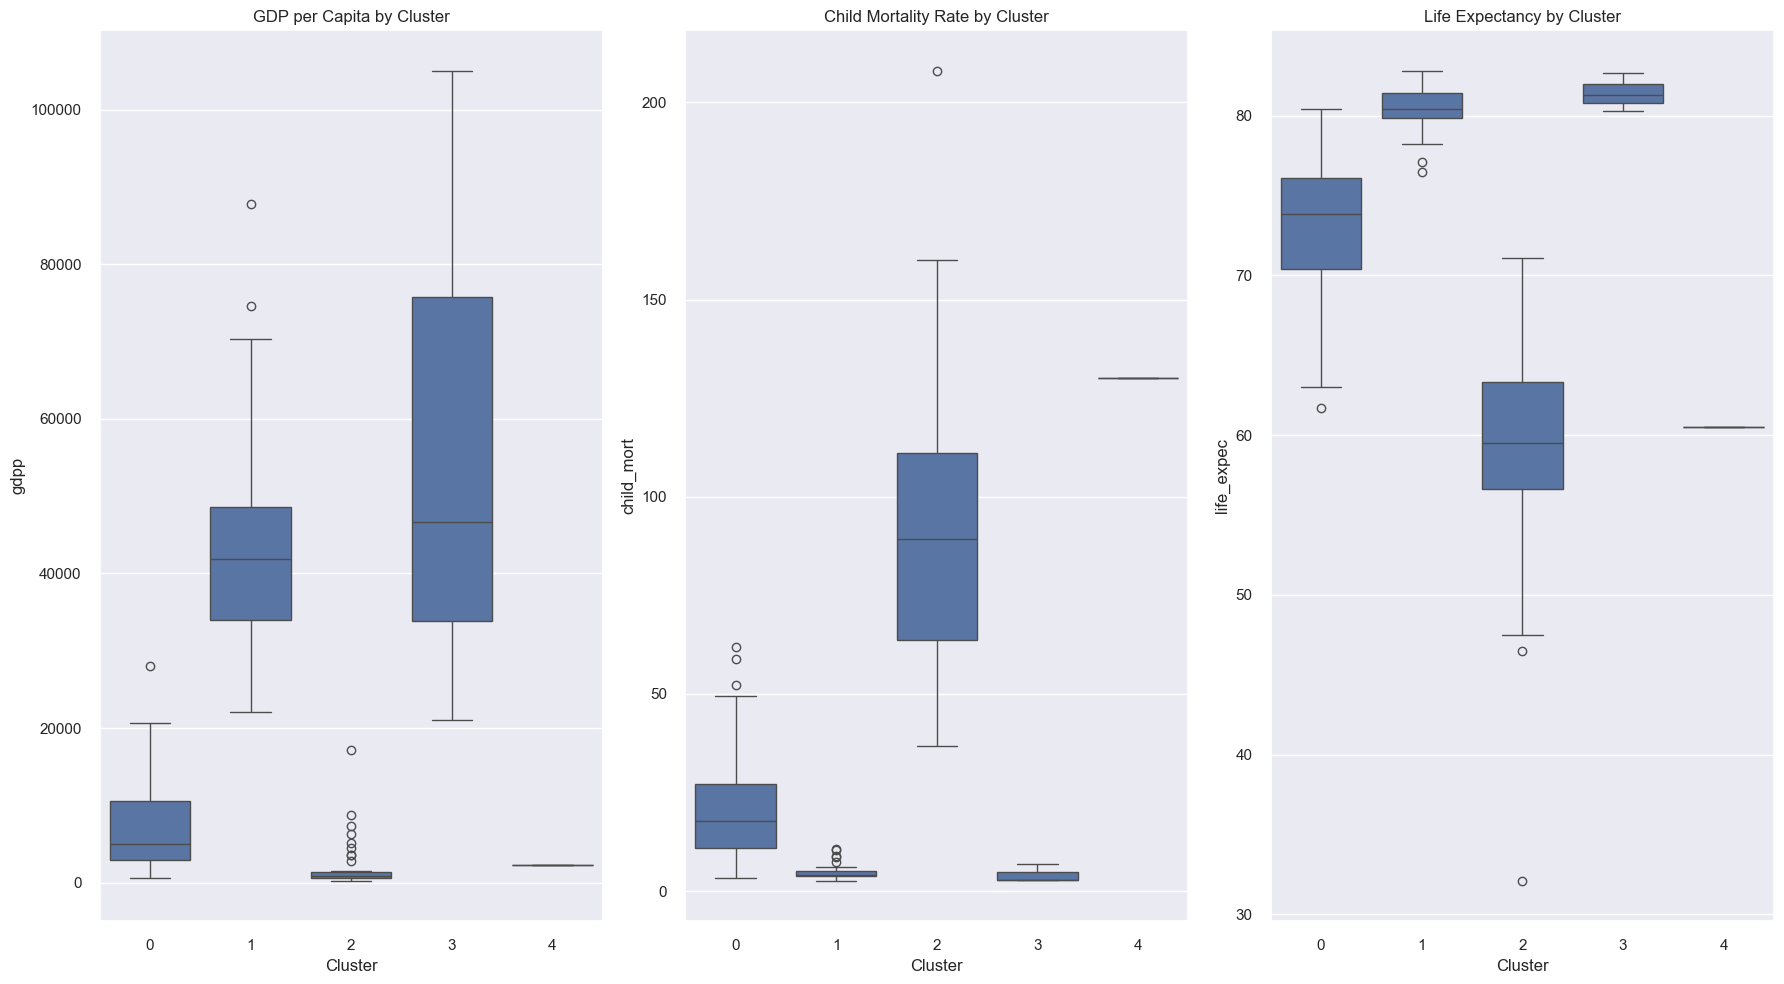

In [54]:
# Create figure for multiple box plots
plt.figure(figsize=(18, 10)) 
# GDP per Capita by Cluster
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='gdpp', data=df)
plt.title('GDP per Capita by Cluster') 

# Child Mortality Rate by Cluster
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='child_mort', data=df)
plt.title('Child Mortality Rate by Cluster') 

# Life Expectancy by Cluster
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='life_expec', data=df)
plt.title('Life Expectancy by Cluster') 
plt.savefig("Images/clusterspervariable.png")
plt.tight_layout()
plt.savefig("Images/clusterspervariable.png")
plt.show()


The box plots above compare the distributions of GDP per capita, Child Mortality Rate, and Life Expectancy  across the 5 clusters identified in our dataset. These plots can offer valuable insights into the socio-economic and health status of countries within each cluster:

*Now let's understand what the model is telling us*

- GDP per Capita by Cluster: Shows the economic disparity among clusters, with some clusters having significantly higher GDP per capita than others. This can indicate varying levels of economic development and wealth.

- Child Mortality Rate by Cluster: Provides insights into the health and well-being of the youngest populations in different clusters. Clusters with higher child mortality rates may face more significant health challenges and potentially lower access to healthcare services.

- Life Expectancy by Cluster: Highlights differences in overall health and living conditions among clusters. Higher life expectancy in certain clusters can reflect better health outcomes, possibly due to higher healthcare spending, better nutrition, and more effective public health policies.

These visualizations can help policymakers, researchers, and analysts to understand the multifaceted nature of development, identify which clusters may require more attention or resources, and tailor interventions to the specific needs of countries within each cluster.

##### I am curious aboput clusters 3 and 4 and want to investigate further

In [55]:
df2 = df[df["Cluster"]>= 3]

In [56]:
df2.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.000,60.5,5.84,2330,4
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3


In [57]:
#exporting the datatable for GIT
df2 = df2.head(5)
dfi.export(df2, 'Images/Cluster2_3table.png')

Thse groups dont seem a little off. Possibly given by errors or outliers?

### Outlier analysis

Outlier analysis involves identifying and examining data points that deviate significantly from the rest of the data.
These outliers can sometimes indicate data entry errors, unusual but valid data points, or other phenomena worth investigating. In the context of this dataset, outliers across socio-economic and health indicators could reveal countries with exceptional circumstances or data anomalies.

In [ ]:
# Define a function to identify outliers using IQR
def identify_outliers(Dat, column): 
    Q1 = Dat[column].quantile(0.25) 
    Q3 = Dat[column].quantile(0.75) 
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
    # Filter outliers 
    outliers = Dat[(Dat[column] < lower_bound) | (Dat[column] > upper_bound)] 
    return outliers 

# Applying the function to identify outliers for 'gdpp', 'child_mort', and 'life_expec'
outliers_gdpp = identify_outliers(df, 'gdpp')
outliers_child_mort = identify_outliers(df, 'child_mort')
outliers_life_expec = identify_outliers(df, 'life_expec') 

# Display the number of outliers detected in each category
outliers_summary = { 
    'Indicator': ['GDP per Capita', 'Child Mortality Rate', 'Life Expectancy'], 
    'Number of Outliers': [len(outliers_gdpp), len(outliers_child_mort), len(outliers_life_expec)]}
 
                                                                         
pd.DataFrame(outliers_summary)


The outlier analysis reveals the following number of outliers across the three key indicators:

- GDP per Capita: 25 outliers identified. These are countries with exceptionally high or low GDP per capita compared to the global distribution, possibly indicating very high-income economies or countries with significant economic challenges.

- Child Mortality Rate: 4 outliers detected. These outliers could represent countries with unusually high rates of child mortality, potentially due to healthcare access issues, nutritional deficiencies, or other public health challenges.

- Life Expectancy: 3 outliers found. These are countries with significantly higher or lower life expectancy rates, which could be due to advanced healthcare systems, lifestyle factors, or, conversely, severe health crises.

For a more detailed understanding, you might examine the specific countries that are outliers in each category and investigate the factors contributing to their exceptional status. This could involve looking into economic policies, healthcare infrastructure, or other socio-political factors in those countries.
Outlier analysis can provide valuable insights into unique or extreme cases, helping to inform targeted interventions or further research into the causes and implications of such deviations from the norm.

*A possible next step could be to remove the outliers from the datasets and rerun the analysis as this might provide a better fit for the machine learning model as you are taking a sample of data points from within a tighter range of your data.*

In [ ]:
#exporting the datatable for GIT
df3 = pd.DataFrame(outliers_summary) 
dfi.export(df3, 'Images/outliers.png')